# National School Data Analysis
###### Group B: Steven and Joshua


### Introduction
The level of education has been one of the most essential factor in the development of the country. This report therefore focus on analyzing the state of Indonesian's education system in each region within 5-10 years period and discovering the element for a school to be success. The objective of these findings is going to be valuable for schools and other education department to grow which further turns Indonesia into an advance country.

The dataset used to explore was accessed through the Indonesian ministry of education and culture website, which can be access through the following link:

Dataset1: [https://dapo.dikdasmen.kemdikbud.go.id/sp](https://dapo.dikdasmen.kemdikbud.go.id/sp)

Dataset2: [http://statistik.data.kemdikbud.go.id/](http://statistik.data.kemdikbud.go.id/)


The main questions this paper aims to answer are:
1. What is the state of Indonesian education within the past 5-10 years nationally.

2. How large is the discrepancy/inequality in Indonesian education.

3. What is the parameters that contribute the most to a school success. 

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Question 1: What is the state of Indonesian education whithin the past 5-10 years nationally

### The Number of School

In [17]:
#Reading all the dataset and append it on df array

df = []
for i in range(1,10):
    names = "Desktop/dataset/data_sekolah/df" + str(i) + ".csv"
    df.append(pd.read_csv(names, sep=";", header=[0,1], index_col=0, skiprows=1))
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [18]:
#Slice the total number of school from all element of df array
Tot_Sekolah = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]


for i in range(8, -1, -1):
    Tot_Sekolah.append(df[i]["Total"]["Jml"].loc["Total"])
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1


numSchool = pd.DataFrame(data=Tot_Sekolah, index=ind, columns = ["Jumlah Sekolah"])

In [19]:
#Applying Linear Regression
Y = numSchool.reset_index().iloc[:,1].values.reshape(-1, 1)
X = np.array(list(range(1,len(numSchool)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

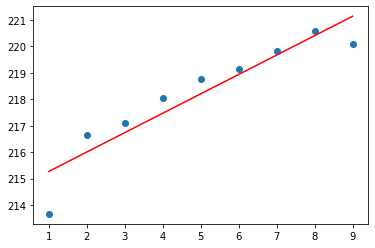

In [20]:
#Plotting Linear Regression
plt.scatter(X,Y)
plt.plot(X, Y_pred, color = 'red')

plt.show()

In [21]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.8683782753112147
intercept: [214.53691667]
slope: [[0.73401667]]


Coefficient of determination indicate how well a statistical model fits the data. For this data the R^2 approaching to 1 which mean the data is linear fit and we can use linear regression.

After plotting the linear regression, we achieve a fitted model that can be written as Y = alpha + beta X
where alpha is 214.5 (intercept) and beta is 0.73 (slope)

### The number of Student per grade (Jenjang)

In [22]:
#Reading all the dataset (murid & guru) and append it to df array

df_m = []
df_g = []
for i in range(1,10):
    names_m = "Desktop/dataset/data_peserta_didik/df" + str(i) + ".csv"
    df_m.append(pd.read_csv(names_m, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    names_g = "Desktop/dataset/data_guru/df" + str(i) + ".csv"
    df_g.append(pd.read_csv(names_g, sep=";", header=[0,1], index_col=0, skiprows=1))
    
    arrays = [['Wilayah', 'Total', 'Total', 'Total', 'SD', 'SD', 'SD', 'SMP', 'SMP', 'SMP', 'SMA', 'SMA', 'SMA', 'SMK', 'SMK', 'SMK', 'SLB', 'SLB', 'SLB'], ['Wilayah', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S', 'Jml', 'N', 'S']]
    df_m[i-1].columns = pd.MultiIndex.from_arrays(arrays)
    df_g[i-1].columns = pd.MultiIndex.from_arrays(arrays)

In [74]:
#Slice the total number of student and teacher from all element of df array
Tot_m = []
Tot_g = []
ind = []
tahun = 2015
sem = ["Genap", "Ganjil"]


for i in range(8, -1, -1):
    Tot_m.append(df_m[i]["Total"]["Jml"].loc["Total"])
    Tot_g.append(df_g[i]["Total"]["Jml"].loc["Total"])
    
    semester = "Semester " + str(tahun) + "/" + str(tahun+1) + " " + sem[i%2]
    ind.append(semester)
    if sem[i%2] == sem[0]:
        tahun += 1
        
ratio_mg = {"Jml Murid":Tot_m, "Jml Guru":Tot_g}
ratio_mg = pd.DataFrame(ratio_mg, index=ind) 


#Type conversion from string to int
repl_list = {'€':'$', ',':'.', r'\.': ''}
ratio_mg["Jml Murid"].replace(repl_list, regex=True, inplace=True)
ratio_mg["Jml Guru"].replace(repl_list, regex=True, inplace=True)

ratio_mg["Jml Murid"] = ratio_mg["Jml Murid"].astype(int)
ratio_mg["Jml Guru"] = ratio_mg["Jml Guru"].astype(int)
#ratio_mg.dtypes

ratio_mg["Jml Murid per Guru"] = ratio_mg["Jml Murid"]/ratio_mg["Jml Guru"]
ratio_mg

,Jml Murid,Jml Guru,Jml Murid per Guru
Semester 2015/2016 Genap,44631066,2912170,15.325708
Semester 2016/2017 Ganjil,45318320,2946136,15.382291
Semester 2016/2017 Genap,45134357,2933290,15.386940
Semester 2017/2018 Ganjil,45388330,2748473,16.514017
Semester 2017/2018 Genap,45209158,2753425,16.419244
Semester 2018/2019 Ganjil,45037323,2755020,16.347367
Semester 2018/2019 Genap,44831625,2759324,16.247322
Semester 2019/2020 Ganjil,44761040,2732340,16.381944
Semester 2019/2020 Genap,44621547,2720778,16.400290


In [75]:
#Applying Linear Regression
Y = ratio_mg.reset_index().iloc[:,3].values.reshape(-1, 1)
X = np.array(list(range(1,len(ratio_mg)+1))).reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

In [108]:
min(ratio_mg["Jml Guru"])

2720778

In [104]:
max(ratio_mg["Jml Murid"]) - min(ratio_mg["Jml Murid"])

766783

In [105]:
max(ratio_mg["Jml Guru"]) - min(ratio_mg["Jml Guru"])

225358

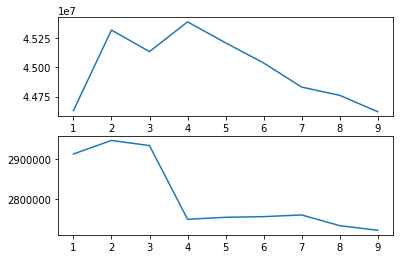

In [113]:
plt.subplot(2,1,1)
plt.plot(range(1,10), ratio_mg["Jml Murid"])
#plt.ylim(44600000, 45900000)
plt.subplot(2,1,2)
plt.plot(range(1,10), ratio_mg["Jml Guru"])
#plt.ylim(2700000,4000000)
plt.show()

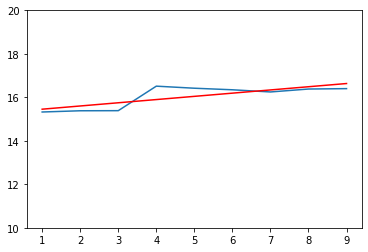

In [94]:
#Plotting Linear Regression
plt.plot(X,Y)
plt.plot(X, Y_pred, color = 'red')
plt.ylim(10,20)
plt.show()

In [92]:
#Print results
print('coefficient of determination:', linear_regressor.score(X,Y))
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)

coefficient of determination: 0.6154252328777234
intercept: [15.30739678]
slope: [[0.14752335]]


## Question 2: How large is the discrepancy/inequality in Indonesian education